MNIST (deber grupo 2)

Integrantes:
David Maldonado 
Esteban Caza
Luis Campaña
Bolivar Alvarez
Joffre Quinteros

In [1]:
#Realizamos la importacion de las librerias a usar
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Cargamos los conjuntos de datos desde los archivos CSV
train_data = pd.read_csv("mnist_train.csv", sep=",")
train_data 

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv("mnist_test.csv", sep=",")
test_data

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Preparar los datos separando características y etiquetas
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']

In [5]:
# Calculamos la suma de los píxeles como una característica adicional
X_train['sum_pixels'] = X_train.sum(axis=1)
X_test['sum_pixels'] = X_test.sum(axis=1)

In [6]:
def calcular_simetrias(datos):
    # Convertir los datos en imágenes de 28x28 píxeles
    datos_pixeles = datos.iloc[:, :784]
    imagenes = datos_pixeles.values.reshape(-1, 28, 28)
    simetria_vertical = []
    simetria_horizontal = []
    
    for imagen in imagenes:
        # Simetría vertical
        mitad_izquierda = imagen[:, :14]
        mitad_derecha = np.fliplr(imagen[:, 14:])
        simetria_v = np.sum(np.abs(mitad_izquierda - mitad_derecha))
        
        # Simetría horizontal
        mitad_superior = imagen[:14, :]
        mitad_inferior = np.flipud(imagen[14:, :])
        simetria_h = np.sum(np.abs(mitad_superior - mitad_inferior))
        
        simetria_vertical.append(simetria_v)
        simetria_horizontal.append(simetria_h)
    
    # Normalizar por el número de píxeles comparados
    simetria_vertical = np.array(simetria_vertical) / (14 * 28 * 255)
    simetria_horizontal = np.array(simetria_horizontal) / (14 * 28 * 255)
    
    return np.array(simetria_vertical), np.array(simetria_horizontal)

In [7]:
#se calcula la simetría con la función y se agrega a las variables
X_train['simetria_vertical'], X_train['simetria_horizontal'] = calcular_simetrias(X_train)
X_test['simetria_vertical'], X_test['simetria_horizontal'] = calcular_simetrias(X_test)

In [8]:
rf_clasificador = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clasificador.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [9]:
 #Predicciones
predicciones = rf_clasificador.predict(X_test)

In [10]:
#precisión del modelo
precision = accuracy_score(y_test, predicciones)
print(f"La precisión del modelo es: {precision * 100:.2f}%")

La precisión del modelo es: 97.02%


In [11]:
reporte = classification_report(y_test, predicciones, output_dict=True)

# Imprimir la precisión y sensibilidad para cada clase
for i in range(len(reporte) - 2):
    clase = str(i)
    if clase in reporte:
        print(f"Clase {clase}:\n  Precisión: {reporte[clase]['precision']:.4f}\n  Sensibilidad: {reporte[clase]['recall']:.4f}\n")


Clase 0:
  Precisión: 0.9729
  Sensibilidad: 0.9898

Clase 1:
  Precisión: 0.9894
  Sensibilidad: 0.9877

Clase 2:
  Precisión: 0.9589
  Sensibilidad: 0.9719

Clase 3:
  Precisión: 0.9641
  Sensibilidad: 0.9584

Clase 4:
  Precisión: 0.9776
  Sensibilidad: 0.9776

Clase 5:
  Precisión: 0.9729
  Sensibilidad: 0.9652

Clase 6:
  Precisión: 0.9731
  Sensibilidad: 0.9823

Clase 7:
  Precisión: 0.9696
  Sensibilidad: 0.9621

Clase 8:
  Precisión: 0.9598
  Sensibilidad: 0.9548

Clase 9:
  Precisión: 0.9619
  Sensibilidad: 0.9504



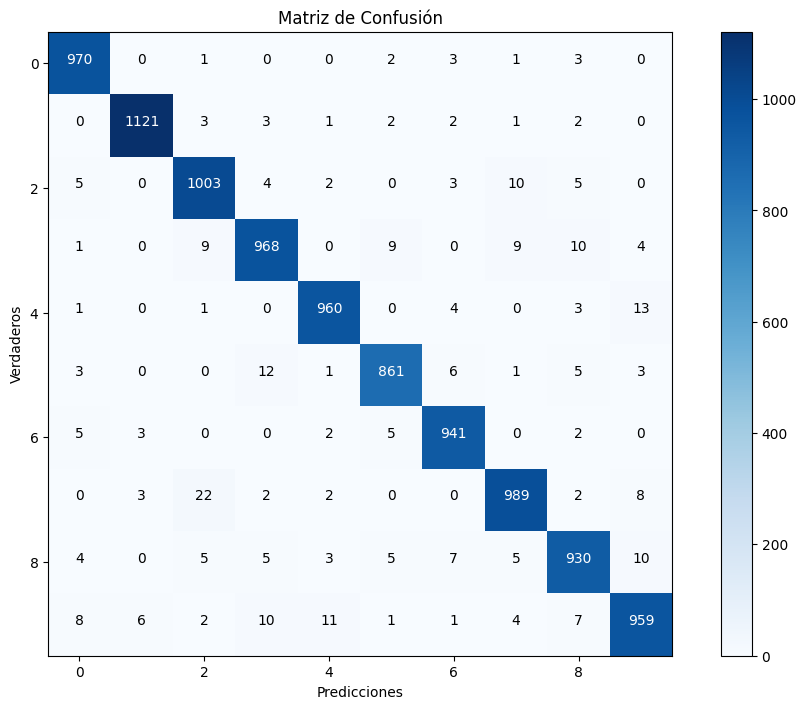

In [12]:
#se crea la matriz de confusión
matriz_confusion = confusion_matrix(y_test, predicciones)

plt.figure(figsize=(10, 7))
# Usar 'Blues' como mapa de colores y ajustar los límites de color con 'vmin' y 'vmax'
plt.imshow(matriz_confusion, interpolation='nearest', cmap='Blues', vmin=0, vmax=np.max(matriz_confusion))
plt.title('Matriz de Confusión')
plt.colorbar()

# Añadir anotaciones de texto dentro de cada celda de la matriz de confusión
threshold = matriz_confusion.max() / 2
for i in range(matriz_confusion.shape[0]):
    for j in range(matriz_confusion.shape[1]):
        color = "white" if matriz_confusion[i, j] > threshold else "black"
        plt.text(j, i, matriz_confusion[i, j], horizontalalignment="center", color=color)

plt.tight_layout()
plt.ylabel('Verdaderos')
plt.xlabel('Predicciones')
plt.show()